# Factors That Affect Loan's Status Outcome
## by Adekola Adebayo

## Investigation Overview


> In this investigation, I wanted to look at the factors that may affect a loan's status outcome. The main focus was on the Credit Scores, Employment Status and the Borrower's APR or Interest Rate.




## Dataset Overview

> Prosper is the first peer-to-peer lending market place, founded in 2005 in the United States. I'm going to be using their data set for this Exploration.

> The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The data contain data about the loans from quarter four in 2005 to quarter one in 2014. I will be exploring a subset of this dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleanloan_df.csv')

In [3]:
# Convert CreditScoreRange dtype to an ordered category
credit_score = df['CreditScoreRange'].unique().tolist().sort()
cs_range = pd.api.types.CategoricalDtype(ordered=True, categories=credit_score)
df['CreditScoreRange'] = df['CreditScoreRange'].astype(cs_range)

In [4]:
# Color palette
base_color = sb.color_palette()[0]
# Compute value counts and Proportions
term_counts = df.Term.value_counts()
term_counts_sum = df.Term.value_counts().sum()
max_term_counts = term_counts[0:1]
term_max_prop = max_term_counts/term_counts_sum
n_csr =  df['CreditScoreRange'].value_counts().sum()
# Calculate the creditscorerange counts
csr_counts =  df['CreditScoreRange'].value_counts()
csr_list = csr_counts.index
list_count=df["ListingCategory"].value_counts()
list_order = list_count.index

# Create Sample plots for simple visualisation of the most relevant LoanStatus
loanstatus = ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due (1-15 days)']
loanstatus_df = df[df['LoanStatus'].isin(loanstatus)]
loanstatus_df.reset_index(drop=True, inplace=True)
loanstatus_df['LoanStatus'] = loanstatus_df['LoanStatus'].astype('object')
print(loanstatus_df.LoanStatus.unique())
print(loanstatus_df.shape)

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'FinalPaymentInProgress']
(110331, 15)


## Distribution of Loan Original Amount

> Loan original take on a very large range of values from about 1000USD at the lowest to about 35000USD at the highest. Plotted on a logarithmic scale, the distribution of loan amount takes on a multi-modal shape with its highest peak at around 4000USD.


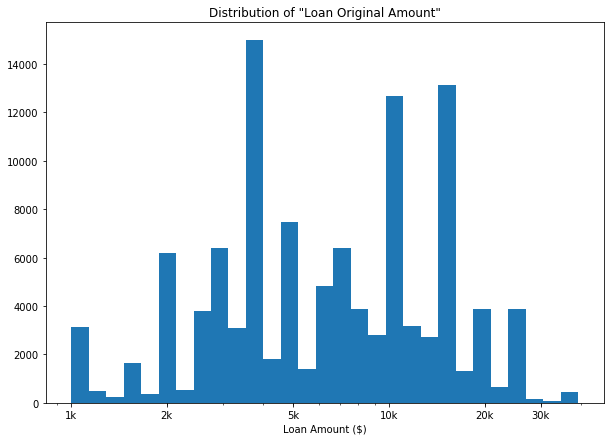

In [5]:
plt.figure(figsize=[10,7])
log_binsize = 0.055
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
# sb.displot(data=loan_df, x='LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of "Loan Original Amount"');
plt.show()

## Distribution of Borrower's APR

> Borrower's APR has a multimodal distribution, With very High peaks between 36% and 37%.

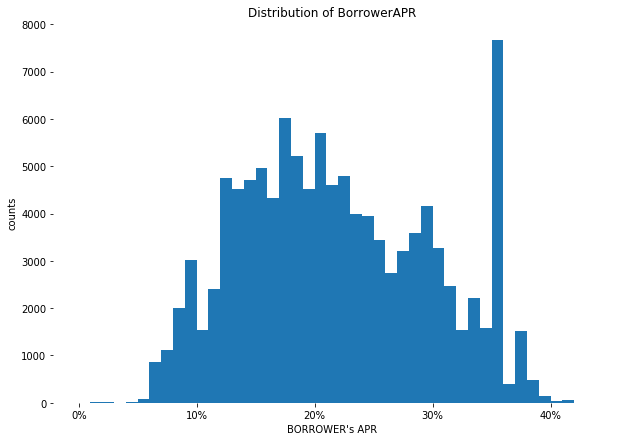

In [6]:
plt.figure(figsize = [10, 7])

# Create bin sizes
bins = np.arange(0, df.BorrowerAPR.max()+0.01, 0.01)
# Plot distribution of BorrowerAPR
plt.hist(data=df, x='BorrowerAPR', bins=bins, color=base_color)
plt.xlabel("BORROWER's APR")
plt.ylabel('counts')
sb.despine(left=True, bottom=True)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.title("Distribution of BorrowerAPR");

## Distribution of Credit Score

> The CreditScoreRange shows a left skewed distribution with less entries on Lower Credit Scores, the highest peak is at range 680-699 with 14.8% entries.

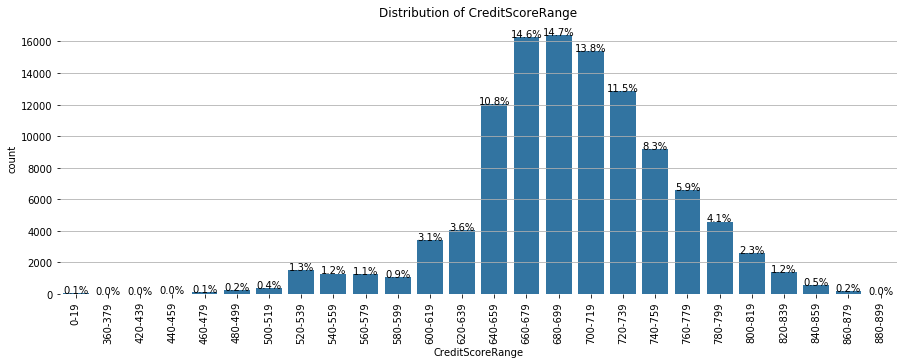

In [7]:
plt.figure(figsize=[15, 5])
sb.countplot(data= df, x='CreditScoreRange', color= base_color)
# get the current tick locations and labels
sb.despine(bottom=True, left=True)
plt.grid(axis='y')
plt.title('Distribution of CreditScoreRange');
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = csr_counts[label.get_text()]
    pct_str = '{:0.1f}%'.format(100*count/n_csr)
    
    # print the anotation below the top of the bar
    plt.text(loc, count+2, pct_str, ha='center', color='black')

## Distribution of Employment Status

> The Employment Status shows that about 60.6% of borrowers are employed, 0.7% are retired and only 0.7% are not employed

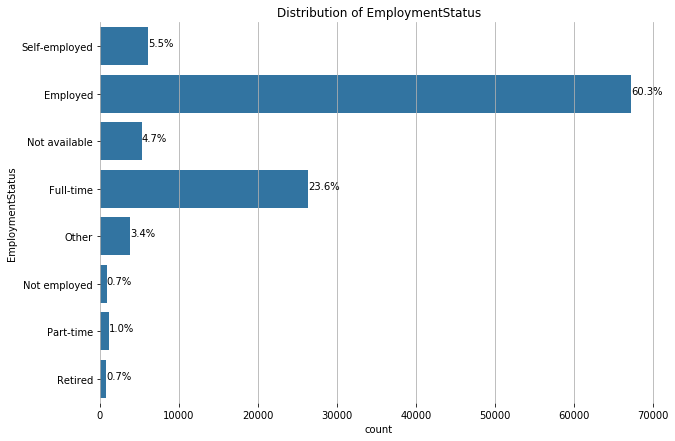

In [8]:
plt.figure(figsize=[10,7])
sb.countplot(data = df, y = 'EmploymentStatus', color=base_color)
column_count= df["EmploymentStatus"].value_counts()
locs,labels=plt.yticks()
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of EmploymentStatus')
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/df.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')


## Distribution of Loan Status

> The Loan status shows that about 51.0% of loans are in the current status, about 32.8% of loans are completed, 10.3% of loans are charged off, and about 4% are defaulted.

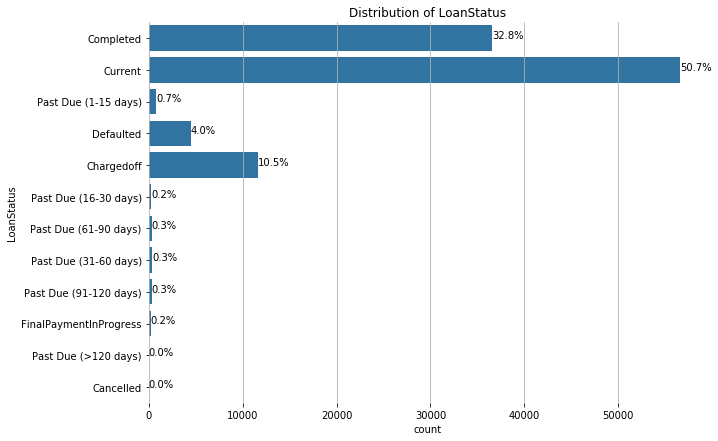

In [9]:
plt.figure(figsize=[10,7])
sb.countplot(data = df, y = 'LoanStatus', color=base_color)
plt.title('Distribution of LoanStatus')
sb.despine(bottom=True, left=True)
plt.grid(axis='x')

loan_count= df["LoanStatus"].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/ df.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')


## Borrower's APR vs. Credit Score

> Credit Score shows a nagative interaction with the Borrower's APR, the lower the credit score, the higher the borrower's APR

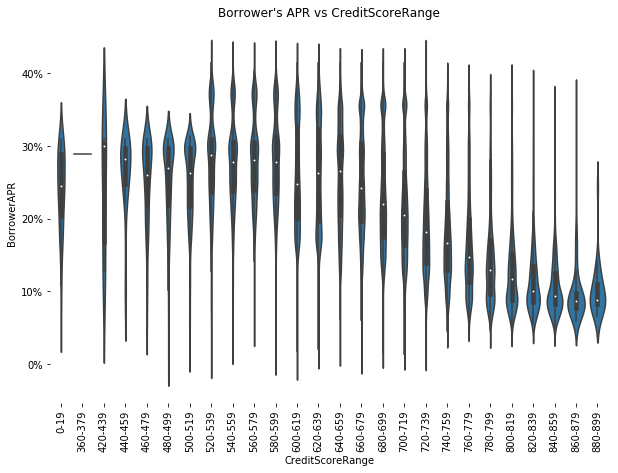

In [10]:
plt.figure(figsize=[10,7])

sb.violinplot(data=df, x='CreditScoreRange', y='BorrowerAPR', color=base_color)
plt.title("Borrower's APR vs CreditScoreRange")
sb.despine(left=True, bottom=True)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.xticks(rotation=90);

## Borrower's APR vs. Credit Score vs. Loan Status

> Most of the borrower's APR of completed loans are less than 26% and the past due are above 29%

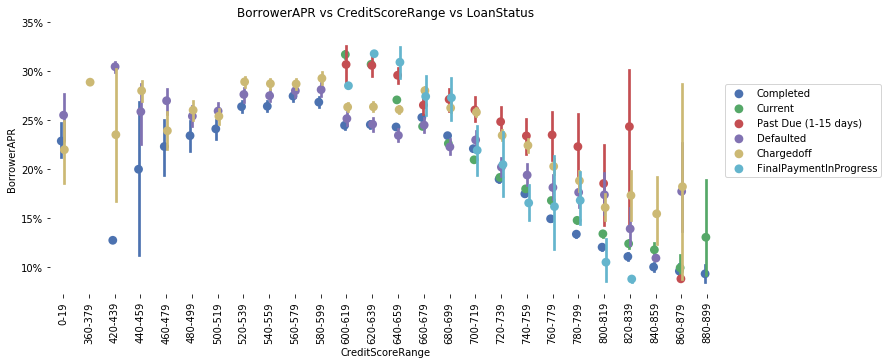

In [11]:
plt.figure(figsize=[12,5])
sb.pointplot(data= loanstatus_df, y='BorrowerAPR', x='CreditScoreRange', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('BorrowerAPR vs CreditScoreRange vs LoanStatus')
sb.despine(left=True, bottom=True)
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90)
plt.yticks([0.10, 0.15, 0.20, 0.25, 0.30, 0.35], ['10%', '15%', '20%','25%', '30%', '35%']);

## Loan Amount vs. Employment Status vs. Loan Status

> As shown below, the Employed status tends to collect higher loans than the rest, and also they tends to complete their loans more often.

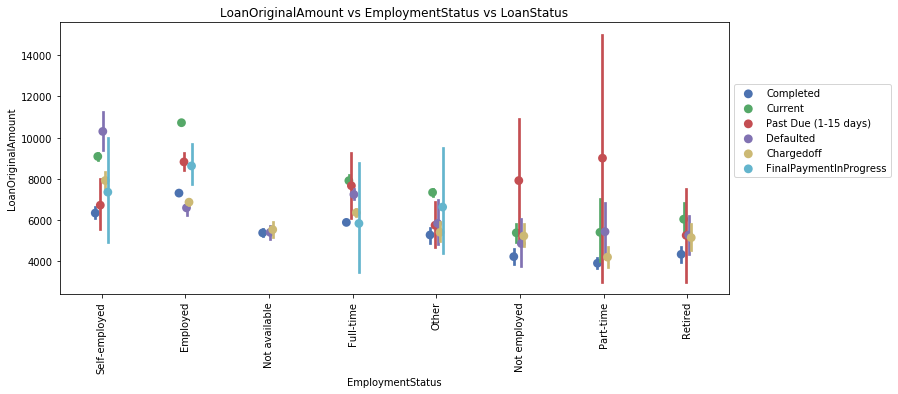

In [12]:
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_df, y='LoanOriginalAmount', x='EmploymentStatus', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('LoanOriginalAmount vs EmploymentStatus vs LoanStatus')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90);

## Loan Amont vs. Credit Score vs. Loan Status
> Credit score have a positve correlation with Loan amount, higher credit score have higher loan amount, and also most of the completed loan status are less than 8000USD.

In [ ]:
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_df, y='LoanOriginalAmount', x='CreditScoreRange', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('LoanOriginalAmount vs CreditScoreRange vs LoanStatus')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90);

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt